In [1]:
#
# std import
#
from itertools import repeat, chain

#
# third party packages
#
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Bio import SeqIO

import seaborn as sns

# setup fancy plot look
sns.set_theme(style='dark')
sns.set_color_codes('colorblind')
sns.set_palette('husl', 2)
sns.despine(top=True, bottom=True)

<Figure size 640x480 with 0 Axes>

# PFAM Scan

In [2]:
df_bh = pd.read_csv('families_OG_4/proteins.domains.besthit.tsv', sep='\t', index_col=[0], header=[0])

In [3]:
df_bh

,query_start,query_end,hit_accession,hit_id,hit_description,hit_start,hit_end,conditional_evalue,bitscore,family
query_id,,,,,,,,,,
AnophelesatroparvusEBRO|AATE014874,25,110,PF14529.10,Exo_endo_phos_2,Endonuclease-reverse transcriptase,19,100,2.200000e-08,21.2,OG6100011
AnophelesatroparvusEBRO|AATE014874,23,105,PF03372.27,Exo_endo_phos,Endonuclease/Exonuclease/phosphatase family,131,204,2.300000e-06,14.6,OG6100011
AnophelesfunestusFUMOZ|AFUN010165,57,133,PF00078.31,RVT_1,Reverse transcriptase (RNA-dependent DNA polym...,33,106,2.400000e-07,16.8,OG6100011
AnophelesalbimanusSTECLA|AALB006878,53,537,PF00067.26,p450,Cytochrome P450,1,457,2.600000e-119,385.0,OG6100014
AnophelesalbimanusSTECLA|AALB015527,59,530,PF00067.26,p450,Cytochrome P450,1,452,3.700000e-113,364.7,OG6100014
...,...,...,...,...,...,...,...,...,...,...
AnophelesfunestusFUMOZ|AFUN015133,5,63,PF16212.9,PhoLip_ATPase_C,Phospholipid-translocating P-type ATPase C-ter...,155,213,3.200000e-06,13.1,OG6r17232557
AnophelesfunestusFUMOZ|AFUN014722,20,72,PF11865.12,DUF3385,Domain of unknown function (DUF3385),89,139,1.600000e-06,14.3,OG6r17232570
AnophelesgambiaePEST|AGAP029964,4,34,PF18498.5,DUF5618,Domain of unknown function (DUF5618),68,98,1.100000e-05,11.9,OG6r17232601


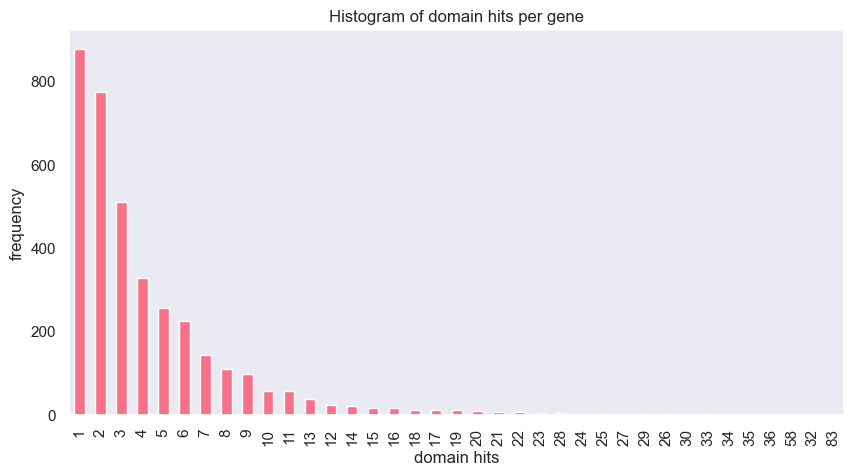

In [4]:
df_bh.index.value_counts().value_counts().plot.bar(figsize=(10, 5))
plt.ylabel('frequency')
plt.xlabel('domain hits')
_ = plt.title('Histogram of domain hits per gene')
plt.savefig('families_OG_4/proteins.domains.besthit.hist.png')

In [5]:
df_fam = pd.read_csv('../../data/VectorBase/families_OG_4.txt', sep='\t', header=None, names=['genes'], index_col=[0])
df_fam = pd.DataFrame(
    data=list(chain(*[list(zip(repeat(i), r.genes.split(' '))) for i, r in df_fam.iterrows()])), 
    columns=['family', 'gene']).set_index('gene')

In [6]:
df_fam

,family
gene,
AnophelesatroparvusEBRO|AATE014874,OG6100011
AnophelesfunestusFUMOZ|AFUN010165,OG6100011
AnophelesalbimanusSTECLA|AALB006878,OG6100014
AnophelesalbimanusSTECLA|AALB015527,OG6100014
AnophelesalbimanusSTECLA|AALB015525,OG6100014
...,...
AnophelesgambiaePEST|AGAP029964,OG6r17232601
AnophelesgambiaePEST|AGAP029888,OG6r17232603
AnophelesgambiaePEST|AGAP029518,OG6r17232605


In [7]:
display(f'{df_fam.index.difference(df_bh.index).size} out of {df_fam.size} have no significant hits to PFAM domains')

'520 out of 4185 have no significant hits to PFAM domains'

In [8]:
df_genes_species_nohit = pd.DataFrame(data={
    'species': df_fam.index.difference(df_bh.index).map(lambda x: x.split('|')[0]),
    'gene': df_fam.index.difference(df_bh.index).map(lambda x: x.split('|')[1]),
    'gene_species': df_fam.index.difference(df_bh.index)
})

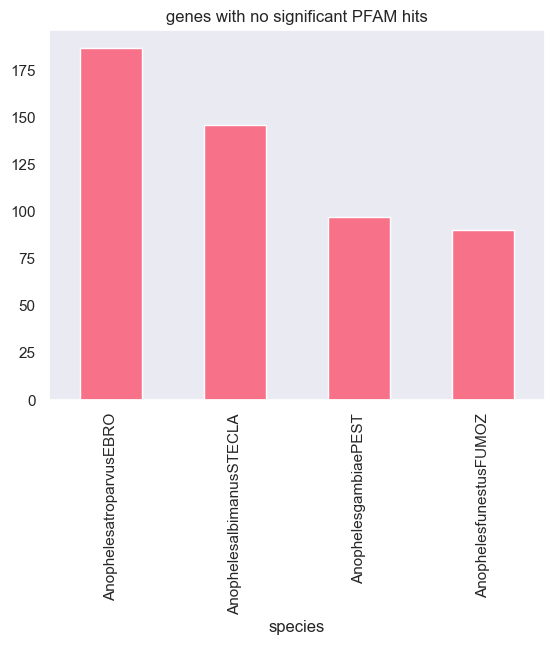

In [9]:
df_genes_species_nohit.species.value_counts().plot.bar(title='genes with no significant PFAM hits')
plt.savefig('families_OG_4/proteins.domains.besthit.nohit.png')

In [10]:
df_fam.loc[df_genes_species_nohit.gene_species].family.value_counts()

family
OG6143897       5
OG6126353       4
OG6100953       4
OG6151102       4
OG6186994       4
               ..
OG6r17133314    1
OG6102627       1
OG6r17214572    1
OG6r17214415    1
OG6r17104092    1
Name: count, Length: 418, dtype: int64

In [11]:
display(f'{df_fam.loc[df_fam.index.difference(df_bh.index)].family.unique().size} families have members with no domain hits')

'418 families have members with no domain hits'

In [12]:
bh_families = df_fam.loc[df_bh.index].family
df_fam_fam = df_fam.reset_index().set_index("family")
df_fam_nohit = df_fam_fam.loc[df_fam_fam.index.difference(bh_families)]
df_fam_nohit

,gene
family,
OG6100395,AnophelesfunestusFUMOZ|AFUN007287
OG6101349,AnophelesatroparvusEBRO|AATE017770
OG6102148,AnophelesalbimanusSTECLA|AALB007656
OG6107243,AnophelesatroparvusEBRO|AATE011702
OG6107243,AnophelesfunestusFUMOZ|AFUN020080
...,...
OG6r17232598,AnophelesgambiaePEST|AGAP029890
OG6r17232600,AnophelesgambiaePEST|AGAP029885
OG6r17232605,AnophelesgambiaePEST|AGAP029518


In [13]:
display(f'{df_fam_nohit.index.unique().size} families have no domain hit')

'324 families have no domain hit'

<Axes: xlabel='gene'>

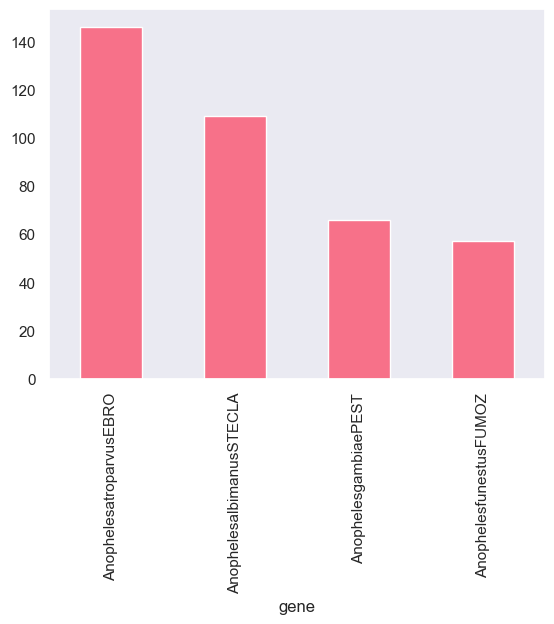

In [14]:
df_fam_nohit.gene.map(lambda x: x.split('|')[0]).value_counts().plot.bar()

<Axes: xlabel='count'>

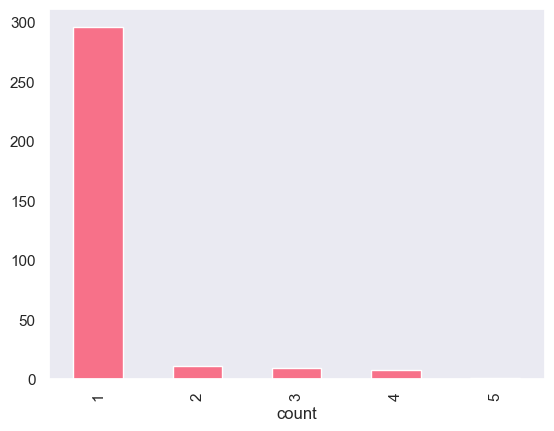

In [15]:
df_fam_nohit.index.value_counts().value_counts().plot.bar()

In [16]:
df_fam_nohit.index.value_counts().value_counts()

count
1    296
2     11
3      9
4      7
5      1
Name: count, dtype: int64

In [17]:
df_fam_nohit.loc[df_fam_nohit.index.value_counts() > 2].gene.map(lambda x: x.split('|')[0]).reset_index().drop_duplicates().family.value_counts()

family
OG6150742       4
OG6126353       4
OG6126582       4
OG6186994       4
OG6151102       4
OG6124339       4
OG6124330       3
OG6315469       3
OG6162719       3
OG6r17102472    3
OG6142123       3
OG6132683       3
OG6132472       3
OG6153343       1
OG6137884       1
OG6166634       1
OG6143897       1
Name: count, dtype: int64

<Axes: xlabel='family'>

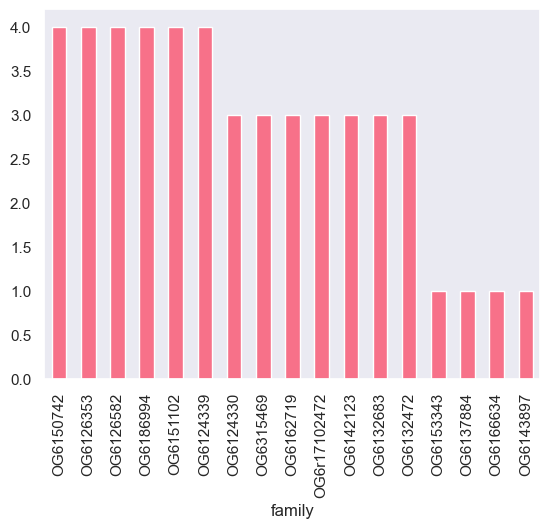

In [18]:
df_fam_nohit.loc[df_fam_nohit.index.value_counts() > 2].gene.map(lambda x: x.split('|')[0]).reset_index().drop_duplicates().family.value_counts().plot.bar()

In [19]:
df_bh_no = pd.read_csv('families_OG_4/proteins.domains.besthit.nooverlap.tsv', sep='\t', index_col=[0], header=[0])

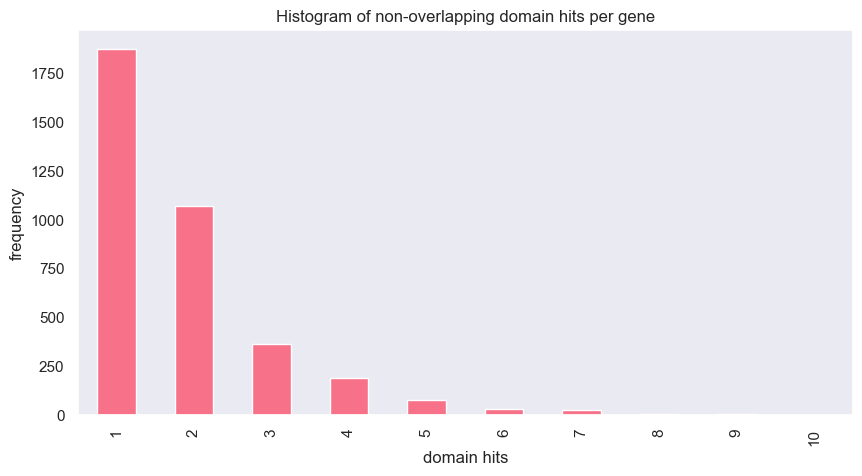

In [20]:
df_bh_no.index.value_counts().value_counts().plot.bar(figsize=(10, 5))
plt.ylabel('frequency')
plt.xlabel('domain hits')
_ = plt.title('Histogram of non-overlapping domain hits per gene')
plt.savefig('families_OG_4/proteins.domains.besthit.nooverlap.hist.png')